In [16]:
from tensorflow.keras.models import model_from_json
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [3]:
#load model
json_file = open('autoencoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
ae = model_from_json(loaded_model_json)
# load weights into new model
ae.load_weights("ae_weights.h5")

In [7]:
#resize image into input size of autoencoder
def prepare_ae_input(filename, resize_dim = (64,64)): 
    im = Image.open('gap_images/'+ filename).convert('RGB') 
    im = np.array(im)
    resize_im = tf.cast(im, tf.float32)/255.
    resize_im = tf.image.resize(resize_im, resize_dim)
    resize_im = np.expand_dims(resize_im, axis=0)
    return resize_im

#get latent space
def get_feature_maps(model, input_image, layer_id = 7):
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(input_image)[0]

In [14]:
# demo: how to get latent space
input_im = prepare_ae_input('gap_11111.jpg')
get_feature_maps(ae, input_im, 7)

array([-0.23590021,  5.7945814 , -1.2378536 ,  0.6134164 ], dtype=float32)

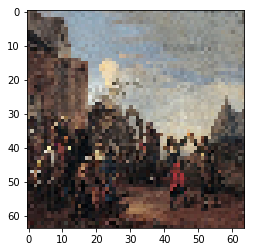

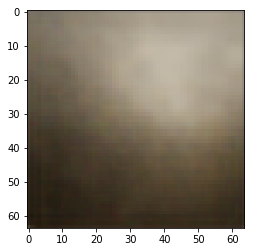

In [21]:
plt.imshow(input_im[0])
plt.show()
plt.imshow(ae.predict(input_im)[0])
plt.show()